In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [10]:
df = pd.read_csv("D:/Documents/Materials/Jan29/CH22_Demand_XY_Train.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])
print(df.head())
print(df.shape)
print(df.describe())

             DateTime        X1     X2      X3      X4             Y
0 2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540
1 2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018
2 2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159
3 2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292
4 2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540
(41932, 6)
                 X1            X2            X3            X4              Y
count  41932.000000  41932.000000  41932.000000  41932.000000   41932.000000
mean       6.520033     12.528736    261.430021    106.260820  504322.861242
std        1.982503      3.212579    363.704356    169.071949  121948.222159
min        1.082333      1.268000      0.005200      0.024700  178443.835400
25%        4.960000     10.464000      0.085800      0.163800  401060.773570
50%        6.640000     12.870000     18.219500     15.860000  506391.834490
75%        7.983333     15.260000   

In [3]:
cols = list(df)[1:6]
print(cols)

['X1', 'X2', 'X3', 'X4', 'Y']


In [4]:
df_for_training = df[cols].astype(float)
df_for_training = df_for_training.values
print(df_for_training[:5])

[[2.18633333e+00 1.37600000e+01 6.63000000e-02 1.54700000e-01
  5.21163835e+05]
 [2.13800000e+00 1.39000000e+01 9.10000000e-02 1.10500000e-01
  4.49066620e+05]
 [2.10433333e+00 1.39000000e+01 8.06000000e-02 1.30000000e-01
  4.37394722e+05]
 [2.04033333e+00 1.40000000e+01 1.18300000e-01 1.24800000e-01
  4.22107633e+05]
 [1.97366667e+00 1.41400000e+01 6.24000000e-02 1.10500000e-01
  4.06923835e+05]]


In [5]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
print(df_for_training_scaled[:5])

[[-2.18599974  0.38326794 -0.71862444 -0.62758717  0.13810103]
 [-2.21037998  0.42684716 -0.71855652 -0.6278486  -0.45311772]
 [-2.22736208  0.42684716 -0.71858512 -0.62773326 -0.54883078]
 [-2.25964488  0.45797516 -0.71848146 -0.62776402 -0.67418948]
 [-2.2932728   0.50155438 -0.71863516 -0.6278486  -0.79870117]]


In [6]:
trainX = []
trainY = []
n_future = 1
n_past = 288
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (41644, 288, 5).
trainY shape == (41644, 1).


In [7]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 288, 64)           17920     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(trainX, trainY, epochs=3, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/3
2343/2343 [==============================] - 628s 267ms/step - loss: 0.0956 - val_loss: 0.0050
Epoch 2/3
2343/2343 [==============================] - 714s 305ms/step - loss: 0.0261 - val_loss: 0.0040
Epoch 3/3
2343/2343 [==============================] - 515s 220ms/step - loss: 0.0233 - val_loss: 0.0038


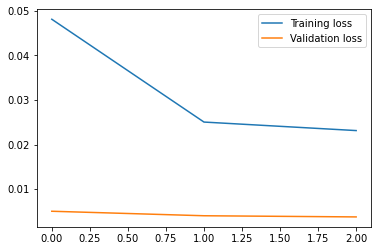

In [9]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [6]:
test_df = pd.read_csv("D:/Documents/Materials/Jan29/CH22_Demand_raw_X_Test.csv")
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])
test_df['Y'] = 0
print(test_df.head())
print(test_df.shape)

             DateTime        X1     X2      X3      X4  Y
0 2022-10-19 04:40:00  5.943333  17.72  0.1001  0.1690  0
1 2022-10-19 04:50:00  5.990000  17.68  0.1092  0.1872  0
2 2022-10-19 05:00:00  5.993333  17.66  0.1235  0.1014  0
3 2022-10-19 05:10:00  6.000000  17.68  0.0949  0.1690  0
4 2022-10-19 05:20:00  6.013333  17.68  0.1326  0.1300  0
(10484, 6)


In [11]:
test_cols = list(test_df)[1:6]
df_for_testing = test_df[test_cols].astype(float)
print(df_for_testing[:5])

         X1     X2      X3      X4    Y
0  5.943333  17.72  0.1001  0.1690  0.0
1  5.990000  17.68  0.1092  0.1872  0.0
2  5.993333  17.66  0.1235  0.1014  0.0
3  6.000000  17.68  0.0949  0.1690  0.0
4  6.013333  17.68  0.1326  0.1300  0.0


In [12]:
df_for_testing_scaled = scaler.transform(df_for_testing)
df_for_testing_scaled = pd.DataFrame(df_for_testing_scaled, columns = ['X1','X2','X3','X4','Y'])
df_for_testing_scaled['Y'] = 0
df_for_testing_scaled = df_for_testing_scaled.values
print(df_for_testing_scaled[:5])

[[-0.29089835  1.61593711 -0.7185315  -0.62750259  0.        ]
 [-0.2673588   1.60348591 -0.71850648 -0.62739494  0.        ]
 [-0.26567741  1.59726031 -0.71846716 -0.62790242  0.        ]
 [-0.26231462  1.60348591 -0.7185458  -0.62750259  0.        ]
 [-0.25558903  1.60348591 -0.71844214 -0.62773326  0.        ]]


In [17]:
df_for_predict_scaled = np.concatenate((df_for_training_scaled[-288:], df_for_testing_scaled), axis=0)

In [18]:
length_for_prediction = len(df_for_testing_scaled)
prediction = []

In [ ]:
from tqdm import tqdm
for i in tqdm(range(n_past, len(df_for_predict_scaled) - n_future + 1)):
    testX = []
    testX.append(df_for_predict_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    testX = np.array(testX)
    df_for_predict_scaled[i,4] = model.predict(testX)[0,0]
    y_pred = scaler.inverse_transform(df_for_predict_scaled[i,:])[4]
    prediction.append(y_pred)
    print(y_pred)

In [20]:
test_df['Y'] = prediction
print(test_df.head())

             DateTime        X1     X2      X3      X4              Y
0 2022-10-19 04:40:00  5.943333  17.72  0.1001  0.1690  382841.697523
1 2022-10-19 04:50:00  5.990000  17.68  0.1092  0.1872  389774.700338
2 2022-10-19 05:00:00  5.993333  17.66  0.1235  0.1014  396927.461817
3 2022-10-19 05:10:00  6.000000  17.68  0.0949  0.1690  404087.259295
4 2022-10-19 05:20:00  6.013333  17.68  0.1326  0.1300  410986.397731


C:\Users\maxpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\maxpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DateTime', ylabel='Y'>

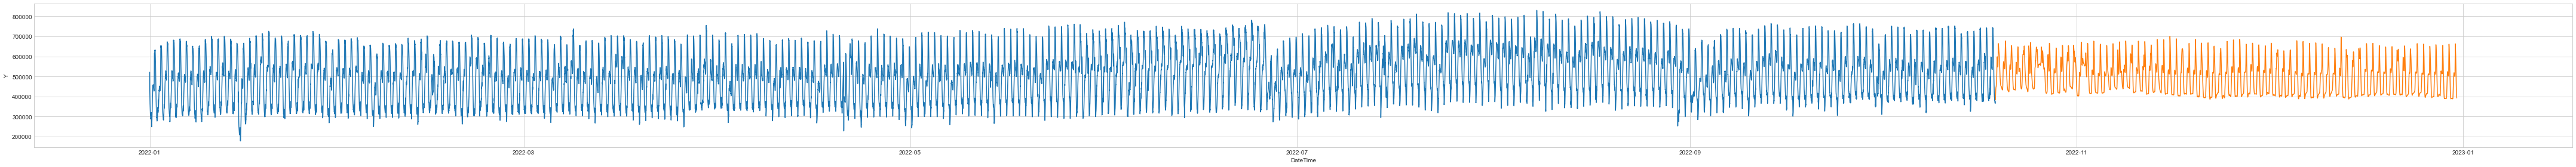

In [23]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(60, 4))
sns.lineplot(df['DateTime'], df['Y'])
sns.lineplot(test_df['DateTime'], test_df['Y'])

In [22]:
test_df.to_csv(r'D:/Documents/Materials/Jan29/result.csv')

In [12]:
result = pd.read_csv('result.csv')
hourly_Y=[]
hourly_Y.append((result.Y[0]+result.Y[1])/2)
for i in range(int((result.shape[0]-2)/6)):
    hourly_Y.append(np.mean(result.Y[i+2:i+8]))
output = pd.DataFrame(hourly_Y)
output.to_csv(r'D:/Documents/Materials/Jan29/result.csv')